In [1]:
# ONLY the following libraries are allowed:
# matplotlib and numpy (imported by %pylab), pandas, scipy, and statsmodels.api.
################################################################################################################################
#  libraries allowed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
################################################################################################################################

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# CELL1
data =pd.read_csv('2017Health.txt',sep='\t',index_col='State')
Teen_Birth_Rate = data['Teen Birth Rate'].values
Violent_Crime_Rate = data['Violent Crime Rate'].values
Percentage_Smokers = data['Percentage Smokers'].values

#Calculating the means
Teen_Birth_Rate_mean= round(mean(Teen_Birth_Rate),2)
Violent_Crime_Rate_mean= round(mean(Violent_Crime_Rate),2)
Percentage_Smokers_mean= round(mean(Percentage_Smokers),2)

#Calculating minimum values
Teen_Birth_Rate_min= round(min(Teen_Birth_Rate),2)
Violent_Crime_Rate_min= round(min(Violent_Crime_Rate),2)
Percentage_Smokers_min= round(min(Percentage_Smokers),2)

#Calculating maximum values
Teen_Birth_Rate_max= round(max(Teen_Birth_Rate),2)
Violent_Crime_Rate_max= round(max(Violent_Crime_Rate),2)
Percentage_Smokers_max= round(max(Percentage_Smokers),2)

#calculating confidence intervals
margin_err1= 1.96*std(Teen_Birth_Rate)/sqrt(len(Teen_Birth_Rate))
CI_1= [round(Teen_Birth_Rate_mean-margin_err1), round(Teen_Birth_Rate_mean + margin_err1)]

margin_err2= 1.96*std(Violent_Crime_Rate)/sqrt(len(Violent_Crime_Rate))
CI_2= [round(Violent_Crime_Rate_mean-margin_err2), round(Violent_Crime_Rate_mean + margin_err2)]

margin_err3= 1.96*std(Percentage_Smokers)/sqrt(len(Percentage_Smokers))
CI_3= [round(Violent_Crime_Rate_mean-margin_err3), round(Violent_Crime_Rate_mean + margin_err3)]

#Tabular dataframe
my_frame= DataFrame(
    {
        "Variables":['Teen Birth Rate','Violent Crime Rate','Percentage Smokers'],
        "Mean":[Teen_Birth_Rate_mean, Violent_Crime_Rate_mean, Percentage_Smokers_mean ],
        "Minimum":[Teen_Birth_Rate_min, Violent_Crime_Rate_min, Percentage_Smokers_min],
        "Maximum":[Teen_Birth_Rate_max, Violent_Crime_Rate_max, Percentage_Smokers_max],
        "Confidence interval":[CI_1, CI_2, CI_3]
        
    }
)
my_frame

,Variables,Mean,Minimum,Maximum,Confidence interval
0,Teen Birth Rate,41.50,15,77,"[38, 45]"
1,Violent Crime Rate,409.59,127,809,"[370, 450]"
2,Percentage Smokers,16.92,11,21,"[409, 410]"


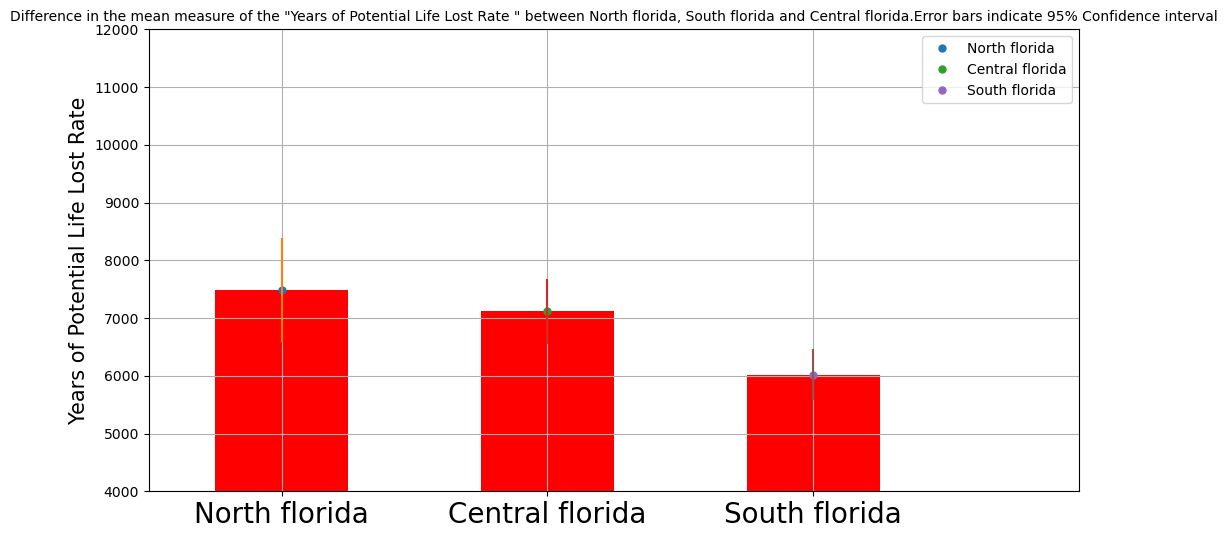

In [3]:
# CELL2
florida=pd.read_csv('2017Health.txt',sep='\t')
#North florida
North_florida= florida.loc[[0,14,16,35,40],:]
values1 = North_florida['Years of Potential Life Lost Rate'].values
#Central florida
Central_florida =florida.loc[[4,27,47,51,52],:]
values2 = Central_florida['Years of Potential Life Lost Rate'].values
#South florida
South_florida= florida.loc[[5,34,42,49,57],:]
values3 = South_florida['Years of Potential Life Lost Rate'].values

#Calculating the means
North_florida_mean= round(mean(values1),2)
Central_florida_mean= round(mean(values2),2)
South_florida_mean= round(mean(values3),2)

#Calculating confidence interval
err1= 1.96*std(values1)/sqrt(len(values1))
CI1 =[round(North_florida_mean-err1), round(North_florida_mean + err1)]

err2= 1.96*std(values2)/sqrt(len(values2))
CI2= [round(Central_florida_mean-err2), round(Central_florida_mean + err2)]

err3= 1.96*std(values3)/sqrt(len(values3))
CI3= [round(South_florida_mean-err3), round(South_florida_mean + err3)]

#plotting bar graph
figure(figsize(12,6))
N= 3
ind= arange(N)#the x locations for the data groups
width= 0.5#width of the bars
bar(ind,[North_florida_mean, Central_florida_mean, South_florida_mean],width, color='r',capsize=10)

#Plotting errorbars
plot(0, North_florida_mean, 'o',markersize=5)
errorbar(0, North_florida_mean, yerr=err1)

plot(1, Central_florida_mean, 'o', markersize=5)
errorbar(1, Central_florida_mean, yerr=err2)

plot(2, South_florida_mean, 'o', markersize=5)
errorbar(2, South_florida_mean, yerr=err3)

legend(['North florida', 'Central florida', 'South florida'], loc='best')

ylabel('Years of Potential Life Lost Rate',fontsize=15)
xtickloc= ind
xticklabels= ['North florida','Central florida','South florida']
xticks(xtickloc,xticklabels,rotation='horizontal',fontsize=20)
title('Difference in the mean measure of the "Years of Potential Life Lost Rate " between North florida, South florida and Central florida.Error bars indicate 95% Confidence interval',fontsize=10)
xlim(-0.5,3.0)
ylim(4000,12000)
#yticks(arange(21))
grid()
show()

In [4]:
# CELL3
#Calculating the difference
diff1= round(abs(North_florida_mean - Central_florida_mean),2)
diff2= round(abs(North_florida_mean - South_florida_mean),2)
diff3= round(abs(South_florida_mean - Central_florida_mean),2)

print('North florida vs Central florida difference:',diff1)
print('North florida vs South florida difference:',diff2)
print('South florida vs Central florida difference:', diff3)

#Checking if the value is normal
print('North florida is normal?',stats.shapiro(values1)[1]>0.05)
print('Central florida is normal?', stats.shapiro(values2)[1]>0.05)
print('South florida is normal?', stats.shapiro(values3)[1]>0.05)
bold = "\33[1m"

#Significance testing
print('North florida vs Central florida significant?',stats.ttest_ind(values1, values2)[1]<0.05)
print('North florida vs South florida significant?', stats.ttest_ind(values1, values3)[1]<0.05)
print('South florida vs Central florida significant?', stats.ttest_ind(values3, values2)[1]<0.05)
print(bold+'North Florida versus Central Florida:Using stats.shapiro to test for normality, the two datasets are normal because p-value is larger than 0.05. Moreover, I used stats.ttest_ind for significant testing since they are normal and independent(datasets are from different regions). Finally, there is no statistically significant difference in years of potential life lost rate between the two regions because p-value is larger than 0.05.\n')
print(bold+'North Florida versus South Florida:After using stats.shapiro to test for normality, the two datasets are normal since p-value is larger than 0.05. In addition, I used stats.ttest_ind for significant testing because they are both normal and independent(datasets belong to different regions). Therefore, there is statistically significant difference in Years of Potential life lost rate between North Florida and South Florida because p-value is less than 0.05\n')
print(bold+'South Florida versus Central Florida:The two datasets are normal(used stats.shapiro to test for normality) because p-value is larger than 0.05. Moreover, I have used stats.ttest_ind for significant testing because they are both normal and independent(datasets collected from different regions). Therefore, there is statistically significant difference in Years of Potential life lost rate between the two regions because p-value is less than 0.05.')

North florida vs Central florida difference: 368.2
North florida vs South florida difference: 1467.8
South florida vs Central florida difference: 1099.6
North florida is normal? True
Central florida is normal? True
South florida is normal? True
North florida vs Central florida significant? False
North florida vs South florida significant? True
South florida vs Central florida significant? True
North Florida versus Central Florida:Using stats.shapiro to test for normality, the two datasets are normal because p-value is larger than 0.05. Moreover, I used stats.ttest_ind for significant testing since they are normal and independent(datasets are from different regions). Finally, there is no statistically significant difference in years of potential life lost rate between the two regions because p-value is larger than 0.05.

North Florida versus South Florida:After using stats.shapiro to test for normality, the two datasets are normal since p-value is larger than 0.05. In addition, I used s

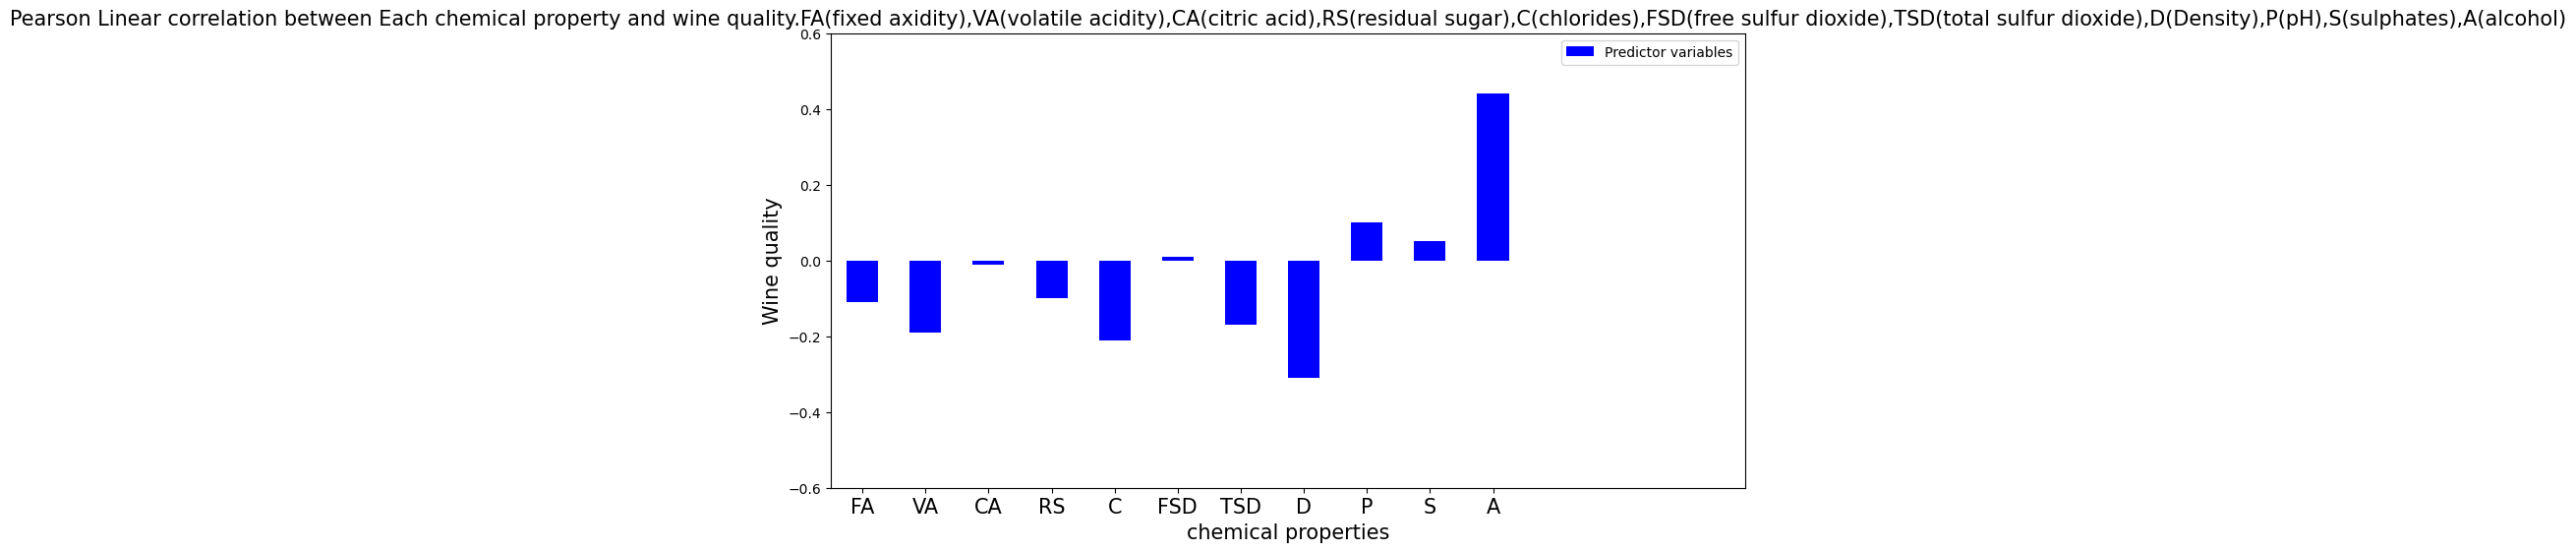

From my visualization above, most chemical properties(predictor variables) have weak correlation coefficient with wine quality(target variable)


In [5]:
# CELL4
data= pd.read_excel('Wine Quality Dataset.xlsx')
#Target variable
qual =data['quality']

#Predictor variables
FA =data['fixed acidity']
VA =data['volatile acidity']
CA =data['citric acid']
RS =data['residual sugar']
C =data['chlorides']
FSD=data['free sulfur dioxide']
TSD=data['total sulfur dioxide']
D =data['density']
P =data['pH']
S =data['sulphates']
A =data['alcohol']

#calculate the linear correlation
FA_corr =round(stats.pearsonr(FA,qual)[0],2)
VA_corr =round(stats.pearsonr(VA,qual)[0],2)
CA_corr =round(stats.pearsonr(CA,qual)[0],2)
RS_corr =round(stats.pearsonr(RS,qual)[0],2)
C_corr =round(stats.pearsonr(C,qual)[0],2)
FSD_corr=round(stats.pearsonr(FSD,qual)[0],2)
TSD_corr=round(stats.pearsonr(TSD,qual)[0],2)
D_corr =round(stats.pearsonr(D,qual)[0],2)
P_corr =round(stats.pearsonr(P,qual)[0],2)
S_corr =round(stats.pearsonr(S,qual)[0],2)
A_corr =round(stats.pearsonr(A,qual)[0],2)

#plotting a bar graph
figure(figsize(12,6))
N=11
ind =arange(N) #the x locations for the data groups
width =0.5 #width of the bars
bar(ind,[FA_corr,VA_corr,CA_corr,RS_corr,C_corr,FSD_corr,TSD_corr,D_corr,P_corr,S_corr,A_corr],width,color='b', label='Predictor variables')
ylabel('Wine quality', fontsize=15)
xlabel('chemical properties', fontsize=15)
xtickloc =ind
xticklabels =['FA','VA','CA','RS','C','FSD','TSD','D','P','S','A']
xticks(xtickloc,xticklabels,rotation='horizontal',fontsize=15)
title('Pearson Linear correlation between Each chemical property and wine quality.FA(fixed axidity),VA(volatile acidity),CA(citric acid),RS(residual sugar),C(chlorides),FSD(free sulfur dioxide),TSD(total sulfur dioxide),D(Density),P(pH),S(sulphates),A(alcohol)',fontsize=15)
xlim(-0.5,14)
ylim(-0.6,0.6)
legend()
show()
print('From my visualization above, most chemical properties(predictor variables) have weak correlation coefficient with wine quality(target variable)')

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:39:38   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

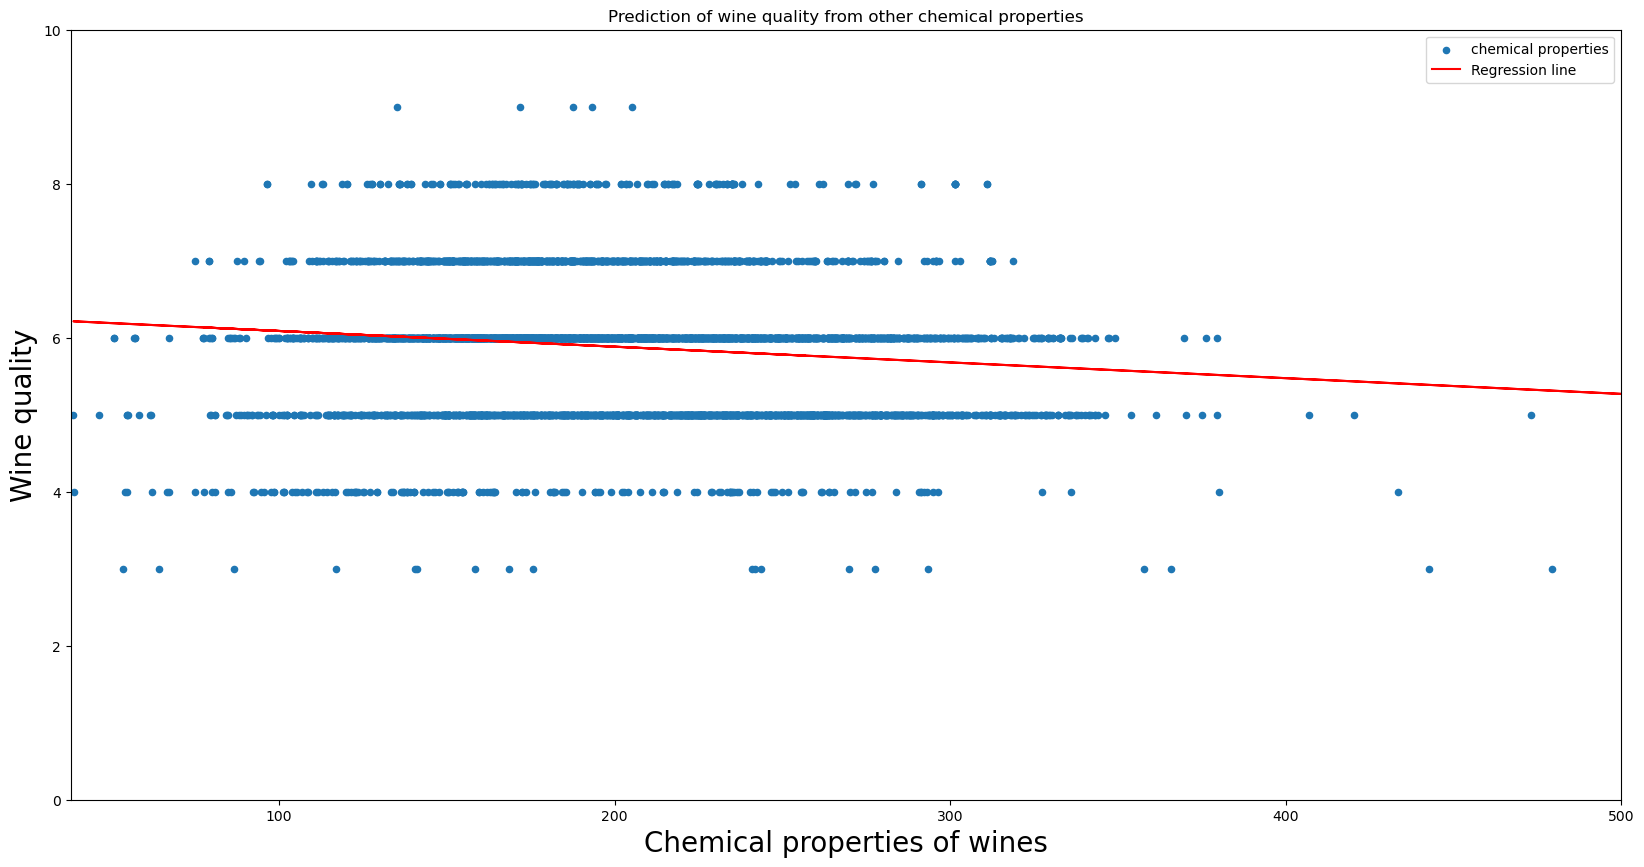

MODEL1: Q=0.07*FA -1.86*VA + 0.02*CA + 0.08*RS -0.25*C + 0.0*FSD -0.0*TSD -150.28*D + 0.69*P + 0.63*S + 0.19*A + 150.19
MODEL2: Q=0.07*FA -1.97*VA + 0.09*CA  -0.15*RS + 0.0*C  -162.94*D + 0.71*P + 0.64*S + 0.18*A + 162.79
MSE1 0.56
MSE2 0.57
aerror1 is normal? False
aerror2 is normal? False


WilcoxonResult(statistic=5601597.0, pvalue=5.979432511491409e-05)

In [6]:
# CELL5
data=pd.read_excel('Wine Quality Dataset.xlsx')
qual= data['quality']
comb = data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
comb1= data[['fixed acidity','volatile acidity','residual sugar','chlorides','total sulfur dioxide','density','pH','sulphates','alcohol']]
comb= sm.add_constant(comb)
results= sm.OLS(qual, comb).fit()

comb1= sm.add_constant(comb1)
results1= sm.OLS(qual, comb1).fit()

#11 predictor variables
FA=round(results.params[1],2)
VA=round(results.params[2],2)
CA=round(results.params[3],2)
RS=round(results.params[4],2)
C=round(results.params[5],2)
FSD=round(results.params[6],2)
TSD=round(results.params[7],2)
D=round(results.params[8],2)
P=round(results.params[9],2)
S=round(results.params[10],2)
A=round(results.params[11],2)

#Target variable
Q= round(results.params[0],2)

#9 predictor variables
b1=round(results1.params[1],2)
b2=round(results1.params[2],2)
b3=round(results1.params[3],2)
b4=round(results1.params[4],2)
b5=round(results1.params[5],2)
b6=round(results1.params[6],2)
b7=round(results1.params[7],2)
b8=round(results1.params[8],2)
b9=round(results1.params[9],2)

#Target variable
b10= round(results1.params[0],2)
print(results.summary())
print('MODEL1: Q='+str(FA)+'*FA '+str(VA)+'*VA + '+str(CA)+'*CA + '+str(RS)+'*RS '+str(C)+'*C + '+str(FSD)+'*FSD '+str(TSD)+'*TSD '+str(D)+'*D + '+str(P)+'*P + '+str(S)+'*S + '+str(A)+'*A + '+str(Q))

#plotting
figure(figsize=(20,10))
xlabel('Chemical properties of wines',fontsize=20)
ylabel('Wine quality',fontsize=20)
title('Prediction of wine quality from other chemical properties')

data['combined']=data['fixed acidity']+data['volatile acidity']+data['citric acid']+data['residual sugar']+data['chlorides']+data['free sulfur dioxide']+data['total sulfur dioxide']+data['density']+data['pH']+data['sulphates']+data['alcohol']
combine = sm.add_constant(data[['combined']])
model= sm.OLS(qual, combine).fit()
scatter(data['combined'], qual, s=20, marker='o',edgecolors=None,label='chemical properties')
plot(data['combined'],model.predict(),color='r',label='Regression line')

xlim(38,500)
ylim(0,10)
legend()
show()

print('MODEL1: Q='+str(FA)+'*FA '+str(VA)+'*VA + '+str(CA)+'*CA + '+str(RS)+'*RS '+str(C)+'*C + '+str(FSD)+'*FSD '+str(TSD)+'*TSD '+str(D)+'*D + '+str(P)+'*P + '+str(S)+'*S + '+str(A)+'*A + '+str(Q))
print('MODEL2: Q='+str(b1)+'*FA '+str(b2)+'*VA + '+str(b3)+'*CA  '+str(b4)+'*RS + '+str(b5)+'*C  '+str(b6)+'*D + '+str(b7)+'*P + '+str(b8)+'*S + '+str(b9)+'*A + '+str(b10))

#Performance evaluation (MSE)
aerror1=abs(results.predict()-qual)
MSE1 = mean(aerror1**2)
print('MSE1', round(MSE1,2))

aerror2=abs(results1.predict()-qual)
MSE2 = mean(aerror2**2)
print('MSE2', round(MSE2,2))

print('aerror1 is normal?',stats.shapiro(aerror1)[1]>0.05)
print('aerror2 is normal?',stats.shapiro(aerror2)[1]> 0.05)
stats.wilcoxon(aerror1, aerror2)



In [7]:
# CELL6
print('MODEL1 shows an equation with all 11 predictor variables, while MODEL2 shows an equation with 9 predictor variables(excluding fsd and tsd because they have weakest correlation with wine quality). After calculating MSE of both Models, MODEL1 is a better model than MODEL2 because it has minimum MSE.However, there is no significant performance difference between MODEL1 and MODEL2 because their p-value is larger than 0.05. Moreover, the main limitation in my model is fact that most variables have weakest correlation with target variable hence difficult to predict variables with strong correlation.')



MODEL1 shows an equation with all 11 predictor variables, while MODEL2 shows an equation with 9 predictor variables(excluding fsd and tsd because they have weakest correlation with wine quality). After calculating MSE of both Models, MODEL1 is a better model than MODEL2 because it has minimum MSE.However, there is no significant performance difference between MODEL1 and MODEL2 because their p-value is larger than 0.05. Moreover, the main limitation in my model is fact that most variables have weakest correlation with target variable hence difficult to predict variables with strong correlation.


In [8]:
import scipy
print(scipy.__version__)

1.11.1
